In [2]:
#设置时间区间及滚动窗口大小，先设定为2013年至今，滚动窗口设置为20天
from datetime import datetime,timedelta
today_date = datetime.now().date()
start_date="2013-01-01"
end_date=today_date- timedelta(days=1)  
rolling=12

In [6]:
import numpy as np
import pandas as pd
from WindPy import w
w.start()
data=w.edb("M0331626,M0331600,M0331601,M0331602,M0331603,M0331604,M0331605,M0331606,M0331607,M0331608,M0331609,\
M0331610,M0331611,M0331612,M0331613,M0331614,M0331615,M0331616,M0331617,M0331618,M0331619,M0331620,M0331621,\
M0331622,M0331629,M0331623,M0331624,M0331625,M0331627,M0331628,M0330255", start_date, end_date,"Fill=Previous",usedf=True)[1]
w.close()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


In [12]:
#将数据转化成周频的
w.start()
trad_date=w.tdays(start_date, end_date, "Period=W",usedf=True)[1]
w.close()
trad_date

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


,
2013-01-04,2013-01-04
2013-01-11,2013-01-11
2013-01-18,2013-01-18
2013-01-25,2013-01-25
2013-02-01,2013-02-01
...,...
2023-08-18,2023-08-18
2023-08-25,2023-08-25
2023-09-01,2023-09-01
2023-09-08,2023-09-08


In [14]:
data=data.fillna(1)
data = pd.merge(trad_date, data, left_index=True, right_index=True, how='inner')

In [17]:
data.columns=['日期','计算机','石油石化','煤炭','有色金属','电力及公用事业','钢铁','基础化工','建筑',
     '建材','轻工制造','机械','电力设备及新能源','国防军工','汽车','消费者服务','家电',
     '纺织服装','医药','食品饮料','农林牧渔','银行','非银行金融','房地产','综合金融',
     '交通运输','电子','通信','传媒','综合','商贸零售','Wind全A指数']
data=data[['计算机','石油石化','煤炭','有色金属','电力及公用事业','钢铁','基础化工','建筑',
     '建材','轻工制造','机械','电力设备及新能源','国防军工','汽车','消费者服务','家电',
     '纺织服装','医药','食品饮料','农林牧渔','银行','非银行金融','房地产','综合金融',
     '交通运输','电子','通信','传媒','综合','商贸零售','Wind全A指数']]
ret=data.div(data.shift(1)) - 1
ret=ret.iloc[1:]
ret

,计算机,石油石化,煤炭,有色金属,电力及公用事业,钢铁,基础化工,建筑,建材,轻工制造,...,非银行金融,房地产,综合金融,交通运输,电子,通信,传媒,综合,商贸零售,Wind全A指数
2013-01-11,0.037097,0.005575,-0.012699,-0.027446,-0.010444,-0.012793,0.006353,-0.032046,-0.016329,-0.000685,...,-0.022633,-0.052801,-0.028413,0.000000,-0.013142,0.022599,0.042775,0.013993,-0.001226,-0.009317
2013-01-18,0.056667,0.045657,0.045084,0.045069,0.065512,0.031092,0.072815,0.043166,0.036519,0.061707,...,0.046158,0.049485,0.043617,0.000000,0.037854,0.070520,0.031988,0.052213,0.083568,0.038564
2013-01-25,-0.029907,-0.011864,-0.040735,-0.033843,-0.026051,-0.023037,-0.021024,-0.032743,-0.003139,-0.027444,...,0.040472,-0.021592,-0.021496,0.000000,-0.006887,-0.049224,-0.027442,-0.015726,-0.013256,-0.015325
2013-02-01,0.033723,0.038029,0.059021,0.039648,0.045844,0.017380,0.040973,0.024340,0.064395,0.028243,...,0.117962,0.153352,0.025811,0.000000,0.037677,0.020542,0.033905,0.033893,0.030049,0.049520
2013-02-08,0.029108,0.022280,0.028012,0.037146,0.013696,0.026358,0.038955,0.056760,0.025359,0.022663,...,-0.046861,0.006284,0.014780,0.000000,0.016545,0.041359,0.024504,0.034973,0.013300,0.017736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-18,-0.043350,-0.021268,-0.016253,-0.039018,0.005074,-0.004491,-0.026989,-0.009215,-0.001314,0.000698,...,-0.007611,-0.013858,-0.019087,-0.037768,-0.007244,-0.045607,-0.036003,-0.038370,-0.008057,-0.023499
2023-08-25,-0.043743,-0.004996,-0.003083,-0.020562,-0.016656,-0.031326,-0.037140,-0.052408,-0.028654,-0.044465,...,-0.003452,-0.023059,-0.028450,-0.031161,-0.045995,-0.038472,-0.027621,-0.003736,-0.046242,-0.029224
2023-09-01,0.056632,0.018161,0.062331,0.034723,-0.012659,0.027179,0.029215,0.016288,0.038645,0.053607,...,-0.004158,-0.001648,0.021998,-0.011983,0.007602,0.080279,0.043965,0.049392,0.015881,0.031722
2023-09-08,-0.013156,0.019669,0.022320,-0.000249,0.000595,-0.009825,0.000139,-0.017031,-0.006624,-0.011818,...,0.005621,-0.003517,-0.011209,-0.006729,-0.017740,0.005241,0.000167,-0.062479,-0.000033,-0.007421


In [18]:
vol=ret.rolling(window=rolling).std()
vol

,计算机,石油石化,煤炭,有色金属,电力及公用事业,钢铁,基础化工,建筑,建材,轻工制造,...,非银行金融,房地产,综合金融,交通运输,电子,通信,传媒,综合,商贸零售,Wind全A指数
2013-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-18,0.045341,0.020707,0.021898,0.025560,0.013567,0.027727,0.021673,0.025246,0.031446,0.023192,...,0.025550,0.041312,0.039079,0.033121,0.016740,0.029760,0.041655,0.049351,0.022264,0.020378
2023-08-25,0.039690,0.019360,0.020530,0.023490,0.014206,0.029387,0.023706,0.028719,0.032655,0.026257,...,0.025610,0.042271,0.039905,0.034108,0.021470,0.029576,0.037200,0.037490,0.025353,0.021565
2023-09-01,0.044258,0.019915,0.026931,0.025829,0.014487,0.030024,0.024537,0.029178,0.034485,0.030899,...,0.024244,0.042261,0.040163,0.033980,0.021311,0.039244,0.038723,0.039966,0.025954,0.023894
2023-09-08,0.039518,0.020438,0.027352,0.025085,0.012714,0.030195,0.023131,0.029304,0.033728,0.030240,...,0.023362,0.042309,0.040402,0.033534,0.021526,0.037074,0.033029,0.038584,0.025013,0.021801


In [19]:
#对应每一天的数据生成波动率排名
vol1=vol.iloc[rolling+1:,:30]
ranks = vol1.rank(axis=1)  
ranks

,计算机,石油石化,煤炭,有色金属,电力及公用事业,钢铁,基础化工,建筑,建材,轻工制造,...,银行,非银行金融,房地产,综合金融,交通运输,电子,通信,传媒,综合,商贸零售
2013-04-19,12.0,5.0,24.0,16.0,14.0,2.0,15.0,20.0,28.0,11.0,...,9.0,29.0,30.0,27.0,1.0,3.0,18.0,4.0,23.0,17.0
2013-04-26,12.0,8.0,24.0,14.0,17.0,3.0,20.0,19.0,28.0,9.0,...,10.0,29.0,30.0,27.0,1.0,5.0,13.0,2.0,22.0,21.0
2013-05-03,14.0,7.0,22.0,9.0,15.0,3.0,19.0,23.0,28.0,13.0,...,8.0,27.0,30.0,29.0,1.0,2.0,16.0,4.0,24.0,20.0
2013-05-10,15.0,6.0,20.0,12.0,19.0,2.0,17.0,16.0,27.0,13.0,...,9.0,26.0,30.0,29.0,1.0,3.0,14.0,5.0,24.0,23.0
2013-05-17,20.0,6.0,10.0,5.0,19.0,2.0,16.0,14.0,27.0,12.0,...,13.0,26.0,28.0,29.0,1.0,3.0,23.0,8.0,25.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-18,29.0,6.0,10.0,16.0,1.0,17.0,7.0,14.0,21.0,12.0,...,3.0,15.0,27.0,26.0,23.0,2.0,19.0,28.0,30.0,11.0
2023-08-25,28.0,3.0,5.0,8.0,1.0,17.0,9.0,16.0,20.0,15.0,...,2.0,14.0,30.0,29.0,22.0,6.0,18.0,25.0,26.0,12.0
2023-09-01,30.0,3.0,13.0,9.0,1.0,16.0,7.0,15.0,20.0,17.0,...,2.0,6.0,29.0,28.0,19.0,4.0,26.0,24.0,27.0,11.0
2023-09-08,28.0,3.0,13.0,10.0,1.0,19.0,6.0,17.0,25.0,20.0,...,2.0,7.0,30.0,29.0,24.0,4.0,26.0,22.0,27.0,9.0


## 作差求平方和

In [33]:
#生成本期相较于前一期的排名变化

# 创建一个新的DataFrame，用于存储结果  
squared_ranks = pd.DataFrame(0, index=ranks.index, columns=['Squared Difference'])  
  
# 计算每行值相较于上一行的平方和  
for column in ranks.columns:  
    squared_ranks['Squared Difference'] += (ranks[column].diff().pow(2)).cumsum()
squared_ranks=squared_ranks.fillna(0)
rank_diff=squared_ranks.diff()
rank_diff=rank_diff.iloc[1:]

In [34]:
rank_diff

,Squared Difference
2013-04-26,150.0
2013-05-03,190.0
2013-05-10,162.0
2013-05-17,384.0
2013-05-24,124.0
...,...
2023-08-18,184.0
2023-08-25,206.0
2023-09-01,252.0
2023-09-08,258.0


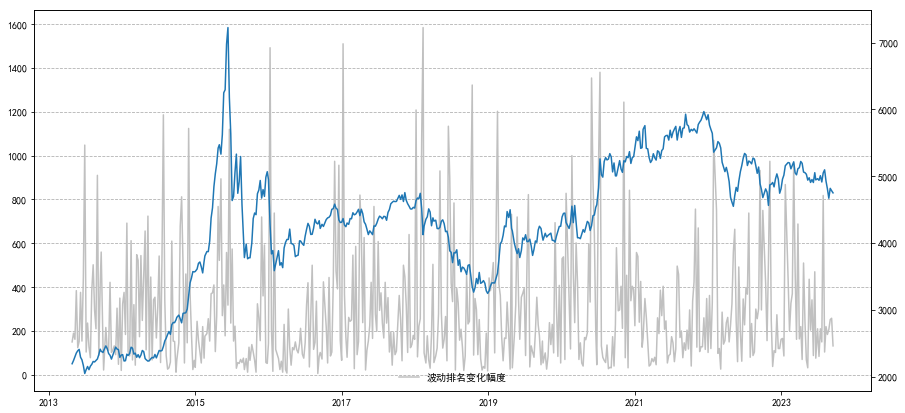

In [35]:
#绘图
draw_data=pd.concat([rank_diff,data.loc[rank_diff.index[0]:]],axis=1)
draw_data=draw_data[['Squared Difference','Wind全A指数']]
draw_data.columns=['波动排名变化幅度','Wind全A指数']

import pandas as pd  
import matplotlib.pyplot as plt  
  
from matplotlib.font_manager import FontProperties  
  
# 设置字体为SimHei  
plt.rcParams['font.sans-serif'] = ['SimHei']  
# 设置图形支持负数  
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize = (15, 7))
# ax.fill_between(HindenburgIndex.index, 0, HindenburgIndex.values, facecolor = 'silver')
draw_data['波动排名变化幅度'].plot(ax = ax, color = 'silver')
ax1 = ax.twinx() 
draw_data['Wind全A指数'].plot(ax = ax1)
ax.grid(axis = 'y', linestyle='--')
ax.legend(frameon=False, ncol = 3, loc='lower center')

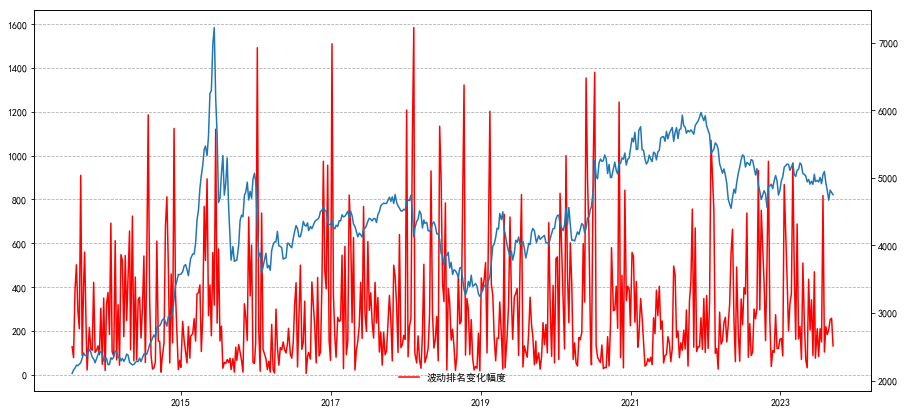

In [41]:
#将上面的灰色指标再平滑六期
import pandas as pd  
draw_data['前两期平均值'] = (draw_data['波动排名变化幅度'].shift(5) + draw_data['波动排名变化幅度'].shift(4) + draw_data['波动排名变化幅度'].shift(3)+
    draw_data['波动排名变化幅度'].shift(2) + draw_data['波动排名变化幅度'].shift(1) + draw_data['波动排名变化幅度']) / 6
draw_data=draw_data[3:]
fig, ax = plt.subplots(figsize = (15, 7))
# ax.fill_between(HindenburgIndex.index, 0, HindenburgIndex.values, facecolor = 'silver')
draw_data['波动排名变化幅度'].plot(ax = ax, color = 'red')
ax1 = ax.twinx() 
draw_data['Wind全A指数'].plot(ax = ax1)
ax.grid(axis = 'y', linestyle='--')
ax.legend(frameon=False, ncol = 3, loc='lower center')

## 直接绝对值相加

In [31]:
#生成本期相较于前一期的排名变化
rank_diff=ranks.diff(axis=0).abs().sum(axis=1) 
rank_diff=rank_diff.iloc[1:]
rank_diff=pd.DataFrame(rank_diff)
rank_diff.columns=['abs_sum']

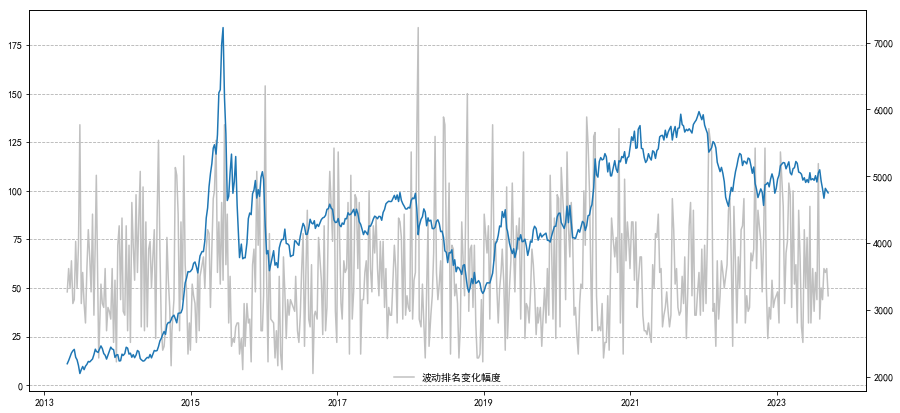

In [32]:
#绘图
draw_data=pd.concat([rank_diff,data.loc[rank_diff.index[0]:]],axis=1)
draw_data=draw_data[['abs_sum','Wind全A指数']]
draw_data.columns=['波动排名变化幅度','Wind全A指数']

import pandas as pd  
import matplotlib.pyplot as plt  
  
from matplotlib.font_manager import FontProperties  
  
# 设置字体为SimHei  
plt.rcParams['font.sans-serif'] = ['SimHei']  
# 设置图形支持负数  
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize = (15, 7))
# ax.fill_between(HindenburgIndex.index, 0, HindenburgIndex.values, facecolor = 'silver')
draw_data['波动排名变化幅度'].plot(ax = ax, color = 'silver')
ax1 = ax.twinx() 
draw_data['Wind全A指数'].plot(ax = ax1)
ax.grid(axis = 'y', linestyle='--')
ax.legend(frameon=False, ncol = 3, loc='lower center')